# Analysis on Indian Premier League
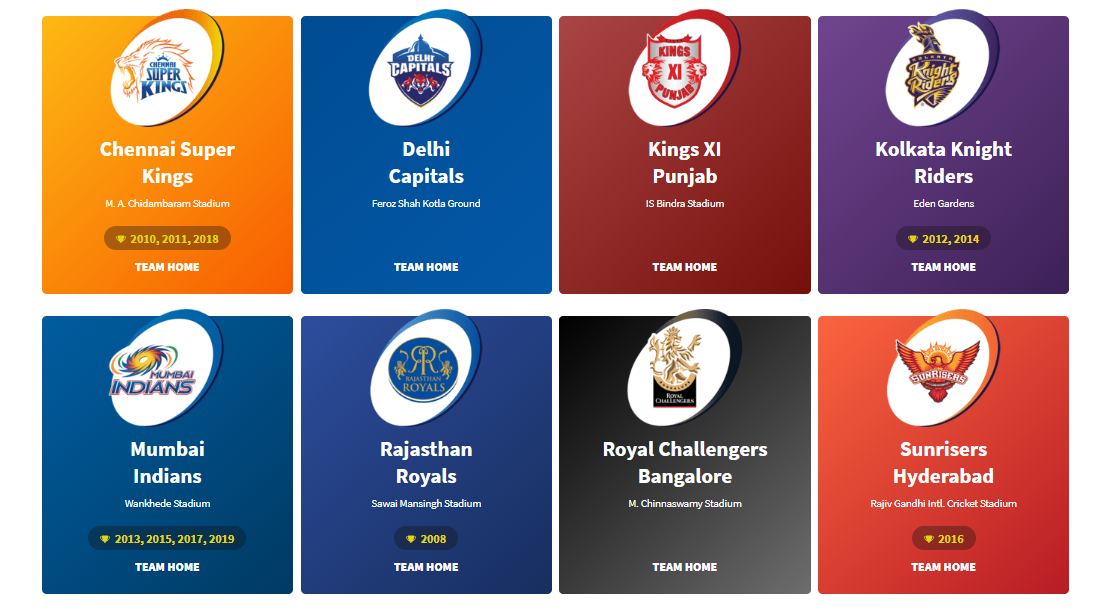
**Introduction:** Indian Premier League (better known as IPL) is a short format (T-20) Mens Cricket tournament that is hosted in India. It is currently presided over by the Board of Cricket Control of India (BCCI). The Tournament comprises of 8 teams who complete with each other in a league format, which is followed by a knockout Stage. Some of the Teams who Played previously are no more in action (For e.g. Deccan Chargers, Kochi Tuskers, Gujrat Lions, Pune Warriors etc). Two teams have been banned for two seasons, but have been a part of the tournament for the rest. Lets check upon our analysis furthur. Just a note, the data available over her is from 2008-2019, and all the data findings have been as per the data.

# Importing the libraries

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
import plotly.graph_objects as go

/kaggle/input/ipldata/matches.csv
/kaggle/input/ipldata/deliveries.csv


# Reading the input File

In [2]:
file=pd.read_csv(r'/kaggle/input/ipldata/deliveries.csv',encoding='latin1')
file.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Reading the second Input File

In [3]:
file2=pd.read_csv('/kaggle/input/ipldata/matches.csv')
file2.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


# Basic Data Cleaning

There have been multiple names for the Same Team- the Data is cleaned in the following portion.

In [4]:
file2.team1.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.team2.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.winner.replace({'Rising Pune Supergiants' : 'Rising Pune Supergiant'},regex=True,inplace=True)
file2.venue.replace({'Feroz Shah Kotla Ground':'Feroz Shah Kotla',
                    'M Chinnaswamy Stadium':'M. Chinnaswamy Stadium',
                    'MA Chidambaram Stadium, Chepauk':'M.A. Chidambaram Stadium',
                     'M. A. Chidambaram Stadium':'M.A. Chidambaram Stadium',
                     'Punjab Cricket Association IS Bindra Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'Punjab Cricket Association Stadium, Mohali':'Punjab Cricket Association Stadium',
                     'IS Bindra Stadium':'Punjab Cricket Association Stadium',
                    'Rajiv Gandhi International Stadium, Uppal':'Rajiv Gandhi International Stadium',
                    'Rajiv Gandhi Intl. Cricket Stadium':'Rajiv Gandhi International Stadium'},regex=True,inplace=True)

# *Analyzing the overall statistics of the Tournament*

# Analysis of the Venues for the Tournament

# Creating a list of the Top 20 Cities where the most number of matches have been played.

Top 15 Cities with the maximum number of Matches Played:
              city  Match Counts
23         Mumbai           101
21        Kolkata            77
10          Delhi            74
2       Bangalore            66
14      Hyderabad            64
8         Chennai            57
16         Jaipur            47
7      Chandigarh            46
26           Pune            38
12         Durban            15
3       Bengaluru            14
31  Visakhapatnam            13
1       Ahmedabad            12
6       Centurion            12
22         Mohali            10
28         Rajkot            10
11     Dharamsala             9
15         Indore             9
17   Johannesburg             8
5       Cape Town             7


Text(0.5, 1.0, 'Top Cities that have hosted IPL Matches')

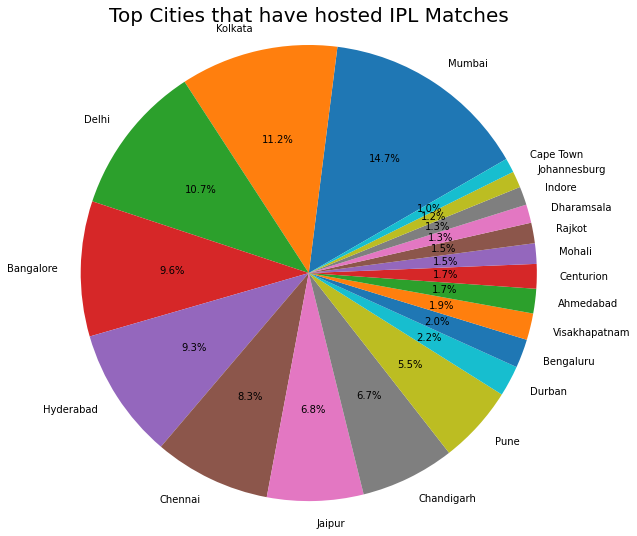

In [5]:
city_counts=file2.groupby('city').apply(lambda x:x['city'].count()).reset_index(name='Match Counts')
top_cities_order=city_counts.sort_values(by='Match Counts',ascending=False)
top_cities=top_cities_order[:20]
print('Top 15 Cities with the maximum number of Matches Played:\n',top_cities)
plt.figure(figsize=(9,9))
plt.pie(top_cities['Match Counts'],labels=top_cities['city'],autopct='%1.1f%%', startangle=30)
plt.axis('equal')
plt.title('Top Cities that have hosted IPL Matches',size=20)

# Creating the list of the Top 20 venues where the most number of IPL matches have been played.

Top 20 Stadiums with the maximum number of Matches Played:
                                                 venue  Match Counts
15                             M. Chinnaswamy Stadium            80
8                                        Eden Gardens            77
9                                    Feroz Shah Kotla            74
34                                   Wankhede Stadium            73
23                 Rajiv Gandhi International Stadium            64
16                           M.A. Chidambaram Stadium            57
22                 Punjab Cricket Association Stadium            56
26                             Sawai Mansingh Stadium            47
17            Maharashtra Cricket Association Stadium            21
5                          Dr DY Patil Sports Academy            17
31                         Subrata Roy Sahara Stadium            17
14                                          Kingsmead            15
32                                    SuperSport Park   

Text(0.5, 1.0, 'Top Stadiums that have hosted IPL Matches')

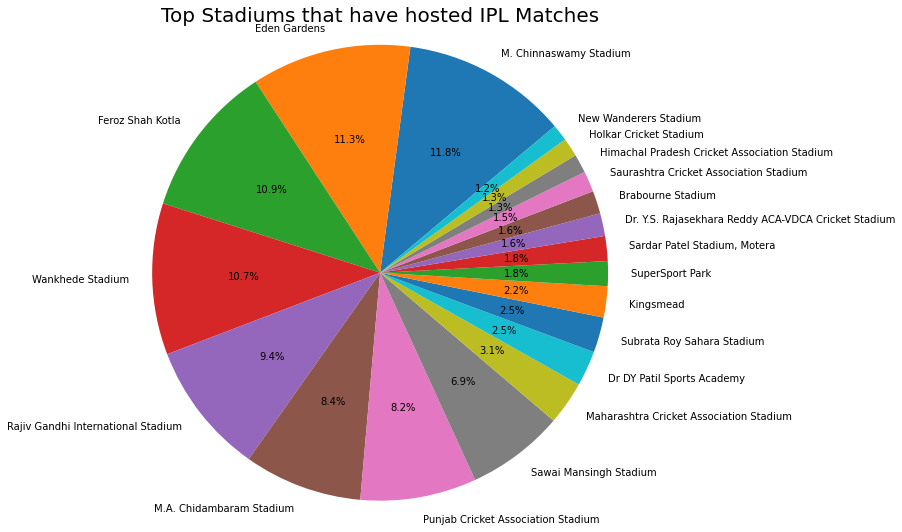

In [6]:
venue_counts=file2.groupby('venue').apply(lambda x:x['venue'].count()).reset_index(name='Match Counts')
top_venues_order=venue_counts.sort_values(by='Match Counts',ascending=False)
top_venues=top_venues_order[:20]
print('Top 20 Stadiums with the maximum number of Matches Played:\n',top_venues)
plt.figure(figsize=(9,9))
plt.pie(top_venues['Match Counts'],labels=top_venues['venue'],autopct='%1.1f%%', startangle=40)
plt.axis('equal')
plt.title('Top Stadiums that have hosted IPL Matches',size=20)

# Player Level Analysis

# Creating the list of Top 10 Scoring Batsman

![](https://cdn.images.express.co.uk/img/dynamic/68/590x/466181_1.jpg)

**In Picture:** Virat Kohli and Suresh Raina- The top Scoring Batsmen in the IPL History

In [7]:
batting_tot=file.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batting_sorted=batting_tot.sort_values(by='Runs',ascending=False)
top_batsmen=batting_sorted[:10] 
print('The Top 10 Batsmen in thr Tournament are:\n',top_batsmen)
fig = px.bar(top_batsmen, x='batsman', y='Runs',
             hover_data=['batsman'], color='Runs',title='Top 10 Batsmen in IPL- Seasons 2008-2019')
fig.show()

The Top 10 Batsmen in thr Tournament are:
             batsman  Runs
486         V Kohli  5434
428        SK Raina  5415
367       RG Sharma  4914
112       DA Warner  4741
392        S Dhawan  4632
92         CH Gayle  4560
290        MS Dhoni  4477
384      RV Uthappa  4446
26   AB de Villiers  4428
147       G Gambhir  4223


# Creating the list of the Top 10 highest scorers in a match

![](https://images.indianexpress.com/2013/04/Gayle-175-759.png)

**In Picture** Chris Gayle Celebrating his 175 run score in a match in IPL

The Top 10 Batting Performances in the IPL History are:
             batsman  Innings Runs  Balls Faced  Strike Rate for Match  inning  \
0          CH Gayle           175           69             253.623188       1   
69      BB McCullum           158           77             205.194805       1   
146  AB de Villiers           133           61             218.032787       1   
207         RR Pant           130           64             203.125000       1   
271  AB de Villiers           129           53             243.396226       1   
324        CH Gayle           128           62             206.451613       1   
386         M Vijay           127           57             222.807018       1   
443       DA Warner           126           60             210.000000       1   
503        V Sehwag           122           62             196.774194       1   
565       SR Watson           121           60             201.666667       2   

                    batting_team                 bo

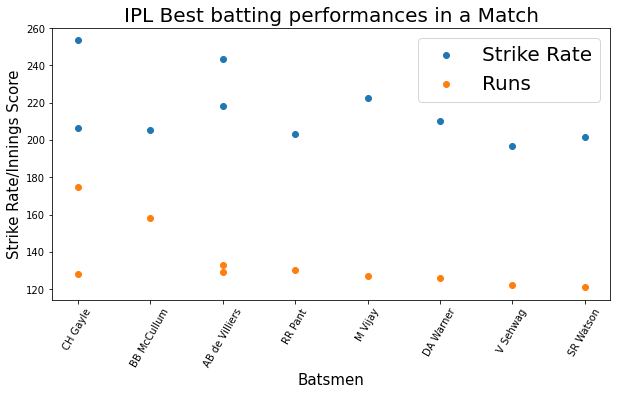

In [8]:
batting_ings=file.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Innings Runs')
batting_ings_sorted=batting_ings.sort_values(by='Innings Runs',ascending=False)
top_batsmen_scores=batting_ings_sorted[:10] 
batsman_ball_faced=file.groupby(['match_id','batsman']).apply(lambda x:x['batsman_runs'].count()).reset_index(name='Balls Faced')
batsmen_performance=pd.merge(top_batsmen_scores,batsman_ball_faced,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_performance['Strike Rate for Match']=batsmen_performance['Innings Runs']*100/batsmen_performance['Balls Faced']
batsmen_innings=pd.merge(batsmen_performance,file,how='inner',left_on=['match_id','batsman'],right_on=['match_id','batsman'])
batsmen_innings_req=batsmen_innings.iloc[:,1:8]
batsmen_innings_req_2=batsmen_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',batsmen_innings_req_2)
x=batsmen_innings_req_2['batsman']
y1=batsmen_innings_req_2['Strike Rate for Match']
y2=batsmen_innings_req_2['Innings Runs']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.scatter(x,y2)
plt.xlabel('Batsmen',size=15)
plt.ylabel('Strike Rate/Innings Score',size=15)
plt.title('IPL Best batting performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Strike Rate','Runs'],prop={'size':20})

**Observation** Chris Gayle and AB de Villiers have appeared twice in the Top 10 run scorer list. Both have represented RCB, when they have enlisted their Top 2 scores- which are in the Top 10 list of IPL History- making RCB achieve Top 4 spots out of 10, Followed by CHennai Super Kings with 2 spots. A very surprising observation lies in the fact that all the bowling teams against whom the top scores in a match is achieved are different- and comprises of  4 Teams who have been IPL champions (Out of 5).








# Creating a list of the top 10 Bowlers with highest number of wickets

![](https://static.toiimg.com/thumb/msid-77675464,imgsize-290541,width-400,resizemode-4/77675464.jpg)

**In Picture** Lasith Malinga- The highest wicket Taker in IPL

In [9]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
bowling_wickets=file[file['dismissal_kind']!='run out']
bowling_tot=bowling_wickets.groupby('bowler').apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
bowling_wick_count=bowling_tot.groupby('bowler').count().reset_index()
bowling_top=bowling_wick_count.sort_values(by='Wickets',ascending=False)
top_bowlers=bowling_top.loc[:,['bowler','Wickets']][0:10] 
print('The Top Wicket Takers in the Tournament are:\n',top_bowlers)
fig = px.bar(top_bowlers, x='bowler', y='Wickets',
             hover_data=['bowler'], color='Wickets',title='Top 10 Bowlers in IPL- Seasons 2008-2019')
fig.show()

The Top Wicket Takers in the Tournament are:
               bowler  Wickets
290       SL Malinga      170
6           A Mishra      156
110  Harbhajan Singh      150
227        PP Chawla      149
82          DJ Bravo      147
46           B Kumar      133
232         R Ashwin      125
296        SP Narine      122
326         UT Yadav      119
244        RA Jadeja      108


# Creating a list of the Top 10 Wicket Takers in a match of IPL

![](https://imagevars.gulfnews.com/2019/06/10/Australian-spinner-Adam-Zampa_16b401ed59c_large.jpg)

**In Picture** Adam Zampa- The most economic bowler in an IPL Match

The Top 10 Batting Performances in the IPL History are:
               bowler  Wickets  Runs Conceeded  Runs per Wicket  inning  \
0            A Zampa        6              19         3.166667       1   
24          A Joseph        6              18         3.000000       2   
48     Sohail Tanvir        6              15         2.500000       1   
72        AS Rajpoot        5              16         3.200000       1   
96        SL Malinga        5              13         2.600000       1   
119          B Kumar        5              20         4.000000       2   
144         A Mishra        5              17         3.400000       2   
168  Harbhajan Singh        5              18         3.600000       2   
193         MM Patel        5              25         5.000000       1   
217       JD Unadkat        5              30         6.000000       2   

            batting_team             bowling_team  
0    Sunrisers Hyderabad  Rising Pune Supergiants  
24   Sunrisers Hyderabad

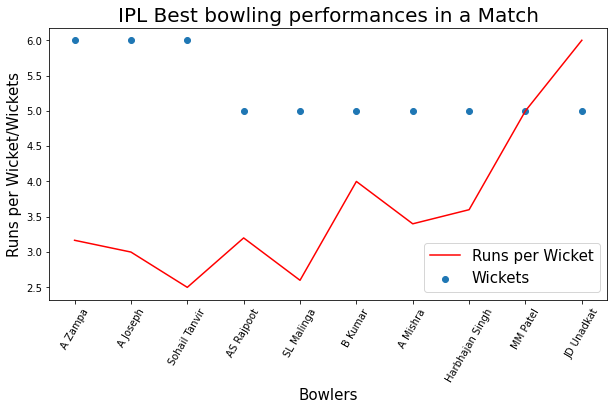

In [10]:
#Run Out is not considered as a wicket in the Bowler's account- hence we shall be removing them first
match_bowling_tot=bowling_wickets.groupby(['match_id','bowler']).apply(lambda x:x['dismissal_kind'].dropna()).reset_index(name='Wickets')
match_bowling_wick_count=match_bowling_tot.groupby(['match_id','bowler']).count().reset_index()
match_bowling_top=match_bowling_wick_count.sort_values(by='Wickets',ascending=False)
match_top_bowlers=match_bowling_top.loc[:,['match_id','bowler','Wickets']][0:10] 
match_bowling_runs=file.groupby(['match_id','bowler']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
match_bowler_performance=pd.merge(match_top_bowlers,match_bowling_runs,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
match_bowler_performance['Runs per Wicket']=match_bowler_performance['Runs Conceeded']/match_bowler_performance['Wickets']
bowler_innings=pd.merge(match_bowler_performance,file,how='inner',left_on=['match_id','bowler'],right_on=['match_id','bowler'])
bowler_innings_req=bowler_innings.iloc[:,1:8]
bowler_innings_req_2=bowler_innings_req.drop_duplicates()
print('The Top 10 Batting Performances in the IPL History are:\n',bowler_innings_req_2)
x=bowler_innings_req_2['bowler']
y1=bowler_innings_req_2['Wickets']
y2=bowler_innings_req_2['Runs per Wicket']
plt.figure(figsize=(10,5))
plt.scatter(x,y1)
plt.plot(x,y2,'r')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Runs per Wicket/Wickets',size=15)
plt.title('IPL Best bowling performances in a Match',size=20)
plt.xticks(rotation=60)
plt.legend(['Runs per Wicket','Wickets'],prop={'size':15})

**Observation** The Team whose players have taken most number of 5+ wickets in a match are Mumbai Indians. No wonder, they have been awarded the trophy most number of times, due to their outstanding performances. The Team against which the maximum number of 5 wickets have been recorder is Sunrisers Hyderabad. This is somewhat due to the lack of middle order batsmen in Sunrisers team in the recent years.

# Creating a list of the top 10 fielders (including Wicket Keepers)

![](https://images.news18.com/ibnlive/uploads/2018/05/Dhoni_BCCI.jpg)

**In Picture** Mahendra Singh Dhoni- the player having most dismissals under his name in IPL

In [11]:
#Creating a list of the best fielders- Considering Catch,Run Out and Stumpings
fielder_list=file.groupby('fielder').apply(lambda x:x).dropna().reset_index()
fielder_list_count=fielder_list.groupby('fielder').count()
fielder_list_counts=fielder_list_count['dismissal_kind'].reset_index(name='Dismissals')
fielder_list_max=fielder_list_counts.sort_values(by='Dismissals',ascending=False)
top_fielders=fielder_list_max[0:10]
print('The Best Fielders(and WicketKeepers) in the Torunament are:\n',top_fielders)

fig = px.bar(top_fielders, x='fielder', y='Dismissals',
             hover_data=['fielder'], color='Dismissals',title='Top 10 Fielders in IPL- Seasons 2008-2019')
fig.show()

The Best Fielders(and WicketKeepers) in the Torunament are:
             fielder  Dismissals
279        MS Dhoni         159
206      KD Karthik         152
372      RV Uthappa         125
412        SK Raina         115
19   AB de Villiers         114
313        PA Patel          97
355       RG Sharma          92
470         V Kohli          90
200      KA Pollard          85
484         WP Saha          82


**Observation**: Wicketkeepers have a better dismissal record. Out of the top 10, 4 have been regular keepers while 2 have been part-time keepers. One of the primary reason is stumpings are credited only to wicketkeepers. Although it is actually unfair to map the fielders and Wicket keeprs- but since in the data there is no distinction available based on the position of the players- and many Wicket Keepers have also played matches- as normal fielders, we go ahead with the given explanation

# Calculating the Strike Rate of a batsman who has scored more than or equal to a Target Run (The Target Run variable can be changed as per requirement- We have consdiered that the batsman has scored a minimum of 1000 runs)

![](https://www.hindustantimes.com/rf/image_size_960x540/HT/p2/2020/09/08/Pictures/_b129f4be-f1a2-11ea-8bce-519453830254.jpg)

**In Picture** Andre Russel- The Player with the best strike rate overall

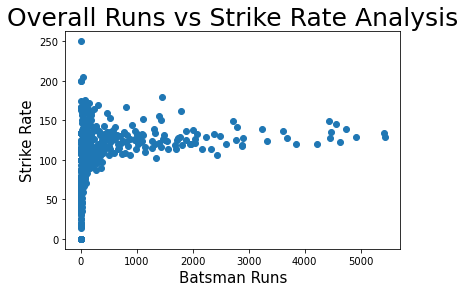

The Top 10 batsmen having highest strike rate, scoring atleast 1000 Runs:
             batsman  Runs  Strike Rate
34       AD Russell  1445   179.950187
374         RR Pant  1792   162.318841
153      GJ Maxwell  1403   155.543237
163       HH Pandya  1118   151.902174
189      JC Buttler  1431   150.000000
488        V Sehwag  2728   148.827059
26   AB de Villiers  4428   148.740343
92         CH Gayle  4560   145.640370
213      KA Pollard  2784   141.751527
112       DA Warner  4741   139.523249


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

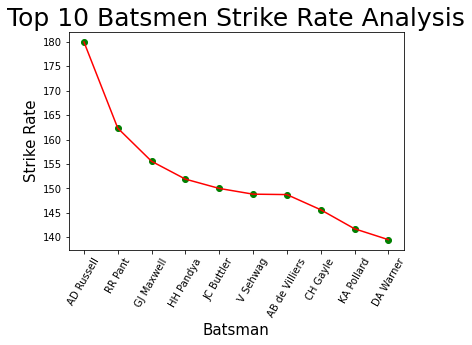

In [12]:
Target_run=1000
batting_tot=file.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
batsman_balls_faced=file.groupby('batsman').count()
batsman_balls_faced_count=batsman_balls_faced['ball'].reset_index(name='Balls Faced')
batsman_runs_balls=pd.merge(batting_tot,batsman_balls_faced_count,left_on='batsman',right_on='batsman',how='outer')
batsman_strike_rate=batsman_runs_balls.groupby(['batsman','Runs']).apply(lambda x:((x['Runs'])/(x['Balls Faced']))*100).reset_index(name='Strike Rate')
plt.scatter(batsman_strike_rate['Runs'],batsman_strike_rate['Strike Rate'])
plt.plot(np.mean(batsman_strike_rate['Strike Rate']),'r')
plt.xlabel('Batsman Runs',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Overall Runs vs Strike Rate Analysis',size=25)
plt.show()
batsman_strike_rate_list=batsman_strike_rate.sort_values(by='Strike Rate',ascending=False)
batsman_strike_rate_above_target_runs=batsman_strike_rate_list[batsman_strike_rate_list['Runs']>=Target_run]
top_strike_rate_batsman=batsman_strike_rate_above_target_runs.loc[:,['batsman','Runs','Strike Rate']][0:10]
print('The Top 10 batsmen having highest strike rate, scoring atleast {} Runs:\n'.format(Target_run),top_strike_rate_batsman)
plt.plot(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='r')
plt.scatter(top_strike_rate_batsman['batsman'],top_strike_rate_batsman['Strike Rate'],color='g')
plt.xlabel('Batsman',size=15)
plt.ylabel('Strike Rate',size=15)
plt.title('Top 10 Batsmen Strike Rate Analysis',size=25)
plt.xticks(rotation=60)

**Observations:** The Strike Rate is basically defined as the runs scored by the Batsman if he faces 100 Balls. A Strike Rate of 179.95, achieved by AD Russel, is a huge value in the game of Cricket and hence he is regarded as one of the best hard-hitters and finishers of the game. Also there are many outliers as evident from the scatterplot. B. Stanlake has scored 5 runs from 2 balls- which makes his strike rate as high as 250.00, but that won't be a suitable comparison to the players who have maintained their performance through all the seasons.

# Calculating the Economy rate of Bowlers who have bowled more than the entered Ball Limit (The Ball Limit variable can be changed as per requirement- We have considered the bowler has atleast bowled 1000 deliveries)

![](https://cdn.dnaindia.com/sites/default/files/styles/full/public/2018/11/17/755352-dale-steyn-file.jpg)

**In Picture** Dale Steyn- The bowler with the best economy rate in IPL

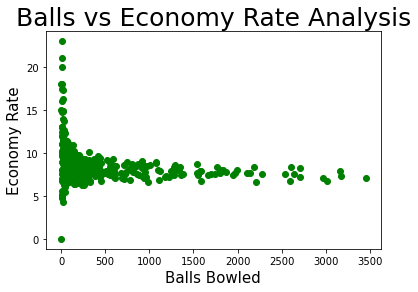

The Top 10 bowlers having best economy rate, bowling atleast 1000 balls:
               bowler  Balls Bowled  Economy Rate
108         DW Steyn          2207      6.671500
207   M Muralitharan          1581      6.698292
269         R Ashwin          3016      6.746021
347        SP Narine          2600      6.782308
301      Rashid Khan          1106      6.819168
126  Harbhajan Singh          3451      7.041437
340       SL Malinga          2974      7.083389
339         SK Warne          1223      7.187244
202         M Kartik          1182      7.197970
53           B Kumar          2707      7.234577


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

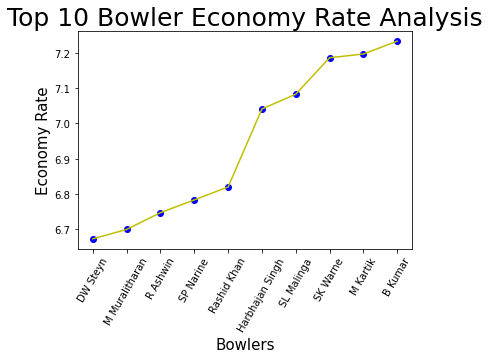

In [13]:
Ball_Limit=1000
bowling_runs=file.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=file.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowler_stats=pd.merge(bowling_runs,bowled_balls,left_on='bowler',right_on='bowler',how='outer')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
plt.scatter(bowler_economy_rate['Balls Bowled'],bowler_economy_rate['Economy Rate'],color='g')
plt.xlabel('Balls Bowled',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Balls vs Economy Rate Analysis',size=25)
plt.show()
bowler_best_economy_rate=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_economy_rate_condition=bowler_best_economy_rate[bowler_best_economy_rate['Balls Bowled']>=Ball_Limit]
top_10_economy=bowler_best_economy_rate_condition.loc[:,['bowler','Balls Bowled','Economy Rate']][0:10]
print('The Top 10 bowlers having best economy rate, bowling atleast {} balls:\n'.format(Ball_Limit),top_10_economy)
plt.plot(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='y')
plt.scatter(top_10_economy['bowler'],top_10_economy['Economy Rate'],color='b')
plt.xlabel('Bowlers',size=15)
plt.ylabel('Economy Rate',size=15)
plt.title('Top 10 Bowler Economy Rate Analysis',size=25)
plt.xticks(rotation=60)

**Observation** The Scatter Plot depicts there are many existing outliers. Players having very low ball counts have shown very high values of economy rate, as well as extremely low values- The counts of which are low, but there are examples in the dataset. These are the potential outliers, which we need to ignore in our analysis. Hence we have chosen the bowlers who have bowled a particular number of balls,and thus we are able to identify the best choice among the entire list.

# Creating a list of the Players who have achieved highest number of 'Man of the Match Awards'

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

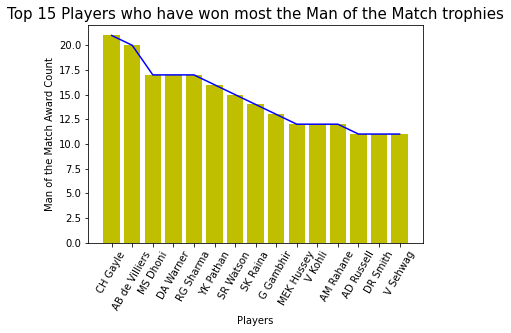

In [14]:
motm=file2.groupby('player_of_match').apply(lambda x:x['player_of_match'].count()).reset_index(name='Man of the Match Awards')
motm_sort=motm.sort_values(by='Man of the Match Awards',ascending=False)
motm_top=motm_sort[0:15]
plt.plot(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='b')
plt.bar(motm_top['player_of_match'],motm_top['Man of the Match Awards'],color='y')
plt.xlabel('Players')
plt.ylabel('Man of the Match Award Count')
plt.title('Top 15 Players who have won most the Man of the Match trophies',size=15)
plt.xticks(rotation=60)


**Observation** Most of the 'Match of the Man' award winners have been Batsmen and All rounders. Bowlers are not present in the Top 15 list. This is clearly indicative of the bias against the bowlers in the Tournament. Let me quote an icident in this regard. In the 2009 Season, Anil Kumble had achieved a 5 Wicket haul, with an economy rate of 1.57 in a match for Royal Challengers bangalore- which is still one of the best performnaces in the history of IPL. But he was not awarded a 'man of the Match' award for that Match. It went to Rahul Dravid for scoring a 48*.

# Best all rounder performance- Considering Batting Factor, Bowling Factor and Fielding Factor.These parameters can be manipulated as per requirement. Showing the Top 10 list.

PS. We have calculated the Overall Scores based on the following metrics:
1. Batting Factor=0.5, i.e. For each Run scored, the overall contribution of the player will be 0.5
2. Bowling Factor=15,i.e. For each Wicket Taken, the overall contribution of the player will be 15
3. Fielding Factor=10, i.e. For each dismissal, the overall contribution of the player will be 10

The sum of all these contributions will be used to calculate the overall score and to rank the best players of the Tournament.

The top 10 best players overall are:
              batsman  Runs  Wickets  Dismissals  Overall Score
228         SK Raina  5415       25       115.0         4232.5
65          DJ Bravo  1498      147        78.0         3734.0
259          V Kohli  5434        4        90.0         3677.0
237        SR Watson  3614       92        44.0         3627.0
194        RG Sharma  4914       15        92.0         3602.0
190        RA Jadeja  1951      108        80.0         3395.5
85   Harbhajan Singh   834      150        46.0         3127.0
207         S Dhawan  4632        4        73.0         3106.0
115       KA Pollard  2784       56        85.0         3082.0
173        PP Chawla   587      149        43.0         2958.5


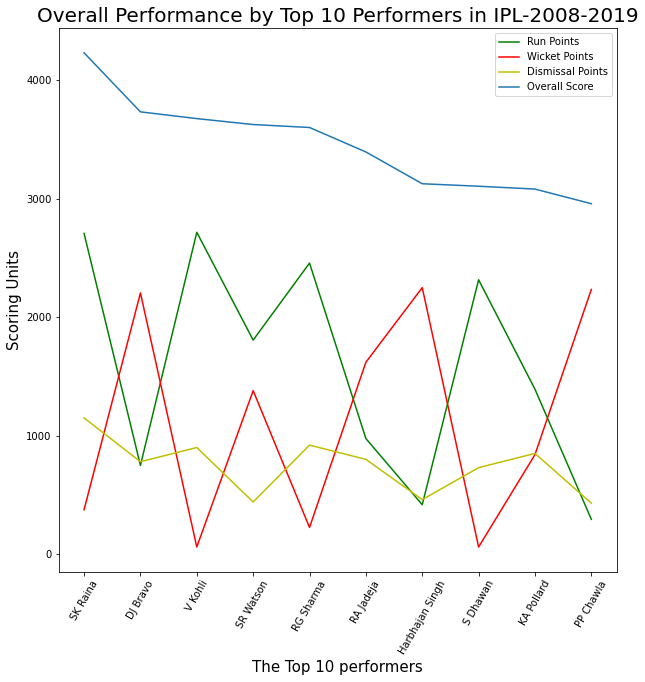

In [15]:
batting_factor=0.5
bowling_factor=15.0
fielding_factor=10.0
all_rounding_1=pd.merge(batting_sorted,bowling_top,left_on='batsman',right_on='bowler',how='inner')
all_rounding_2=pd.merge(all_rounding_1,fielder_list_max,left_on='batsman',right_on='fielder',how='left')
all_rounding_performance=all_rounding_2.groupby(['batsman','Runs','Wickets','Dismissals']).apply(lambda x:(((x['Runs'])*batting_factor)+((x['Wickets'])*bowling_factor)+((x['Dismissals'])*fielding_factor))).reset_index(name='Overall Score')
best_all_round_performance=all_rounding_performance.sort_values(by='Overall Score',ascending=False)
best_overall=best_all_round_performance.loc[:,['batsman','Runs','Wickets','Dismissals','Overall Score']][0:10]
print('The top 10 best players overall are:\n',best_overall)
plt.figure(figsize=(10,10))
plt.plot(best_overall['batsman'],best_overall['Runs']*batting_factor,'g')
plt.plot(best_overall['batsman'],best_overall['Wickets']*bowling_factor,'r')
plt.plot(best_overall['batsman'],best_overall['Dismissals']*fielding_factor,'y')
plt.plot(best_overall['batsman'],best_overall['Overall Score'])
plt.xlabel('The Top 10 performers',size=15)
plt.ylabel('Scoring Units',size=15)
plt.xticks(rotation=60)
plt.title('Overall Performance by Top 10 Performers in IPL-2008-2019',size=20)
plt.legend(['Run Points','Wicket Points','Dismissal Points','Overall Score'])

**Observation** The main reason of keeping the Batting Factor so low as compared to the Bowling an f Fielding parameter is- the number of runs socred in a match is far more than the number of wickets that can be taken by the Teams. Hence inorder to make this list not too much inclined only towards batsmen, we have kept the factor to a very low Value. In the Top 10 we see 3 Batsmen,6 All Rounders and 1 Bowler making up into the list of the most utility players.

# The Scores by an Entered list of Batsmen- through all the Seasons of IPL from 2008-2019.

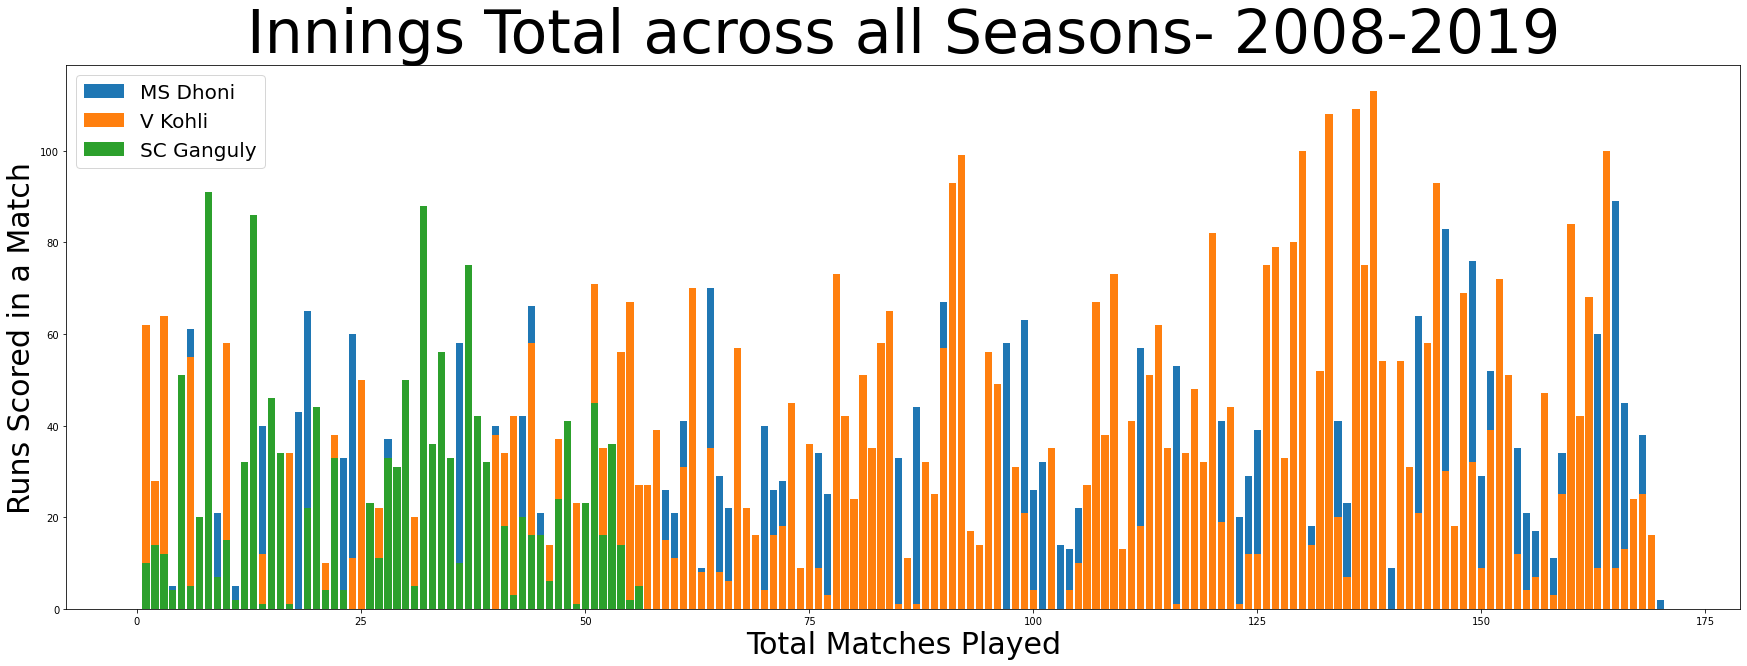

In [16]:
batsman_list_req=['MS Dhoni','V Kohli','SC Ganguly']
batsman=file[file.batsman.isin(batsman_list_req)]
batsman_run=batsman.groupby(['match_id','batsman']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
#bat_list=batsman.batsman.unique()
plt.figure(figsize=(30,10))
for name in batsman_list_req:
    batsman_check=batsman_run[batsman_run.batsman==name]
    batsman_check.index = np.arange(1, len(batsman_check) + 1)
    x=batsman_check.index
    y=batsman_check.Runs
    plt.bar(x,y)
plt.legend(batsman_list_req,prop={'size':20})
plt.title("Innings Total across all Seasons- 2008-2019",fontsize=60)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.show()

**Observation** Although the analysis can be varied if we enter the names of different players in the list- We have listed the 3 Captains of Indian Cricket- Sourav Ganguly, MS Dhoni and Virat Kohli, and monitored their batting performances. As clearly evident, MSD and Kohli have played much more than Ganguly, as Ganguly had taken a retirement much earlier. Also during the initial stages of IPL, Ganguly had a better performance matrix as compared to the rest- which eventually decreased to the point, where he retired from the game. Kohli and Dhoni have played comparable number of matches, with Kohli being a better performer. This also indicates his development and consistency in the Tournament.

# Batsman innings wise performance against Opposition Team, The list of scores in individual matches and Economy rates of bowlers against the Batsman from the opposition Team.

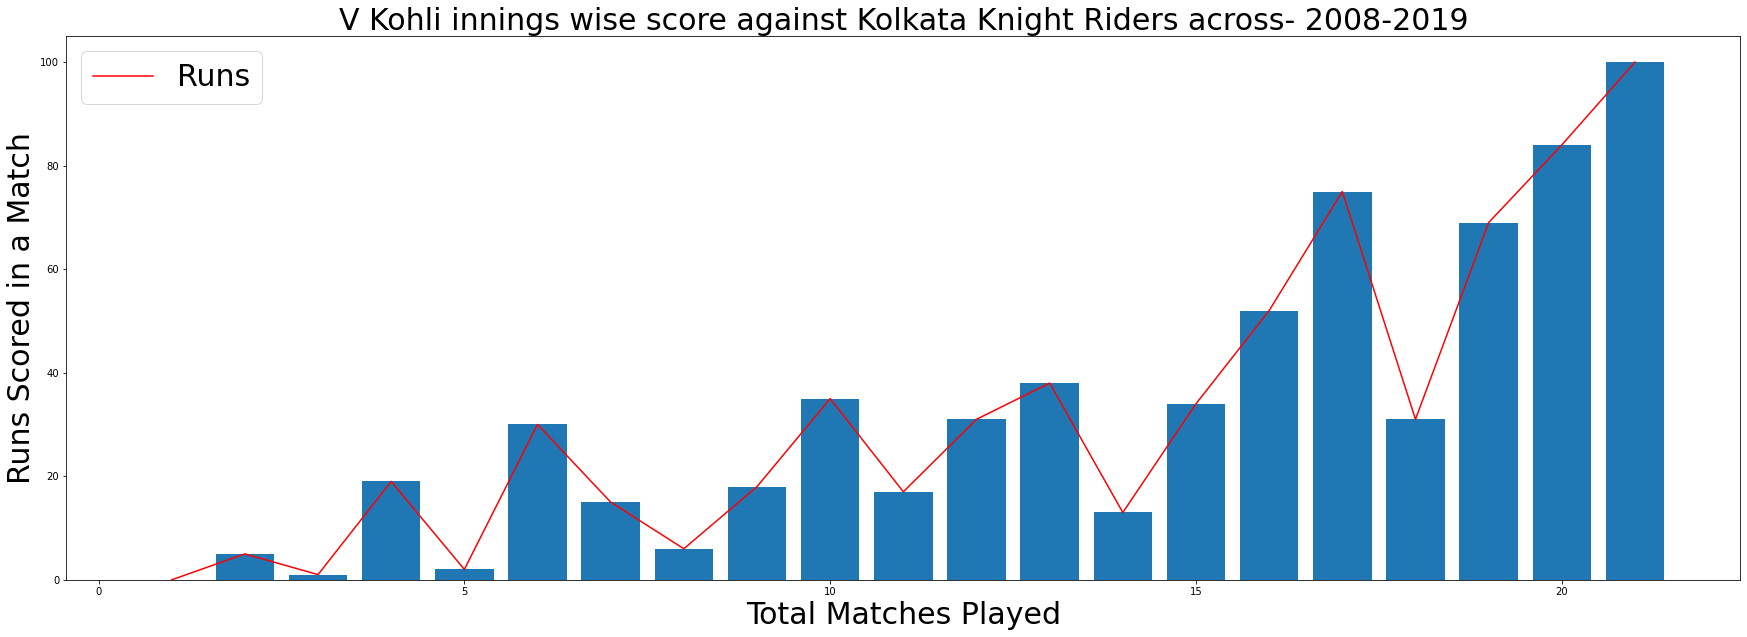

The runs scored in matches: 
 1       0
2       5
3       1
4      19
5       2
6      30
7      15
8       6
9      18
10     35
11     17
12     31
13     38
14     13
15     34
16     52
17     75
18     31
19     69
20     84
21    100
Name: Runs, dtype: int64
---------------------------------------------------------------------------------------------
The Economy rate of the various bowlers of Kolkata Knight Riders against the V Kohli (best to worst)
              bowler  Balls Bowled  Economy Rate
4         JH Kallis            35      5.142857
3     Iqbal Abdulla            13      5.538462
6          L Balaji            18      6.333333
1             B Lee            16      6.375000
10        SP Narine            94      6.382979
5     Kuldeep Yadav            35      6.685714
7          M Morkel            30      7.000000
11  Shakib Al Hasan            21      7.142857
12         UT Yadav            28      7.714286
9         PP Chawla            46      8.739130
0        AD

In [17]:
batsman_list_req=['V Kohli']
opposition_team='Kolkata Knight Riders'
ball_limit=12
cond_1_1=file.batsman.isin(batsman_list_req)
cond_1_2=file.bowling_team==opposition_team
batsman_team=file[(cond_1_1) & (cond_1_2)]
batsman_team_run=batsman_team.groupby(['match_id','batsman','bowling_team']).apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name='Runs')
bowling_runs=batsman_team.groupby('bowler').apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Runs Conceeded')
bowling_balls=batsman_team.groupby('bowler').count()
bowled_balls=bowling_balls['ball'].reset_index(name='Balls Bowled')
bowled_balls_limit=bowled_balls[bowled_balls['Balls Bowled']>=ball_limit]
bowler_stats=pd.merge(bowling_runs,bowled_balls_limit,left_on='bowler',right_on='bowler',how='inner')
bowler_economy_rate=bowler_stats.groupby(['bowler','Balls Bowled']).apply(lambda x:(((x['Runs Conceeded'])/(x['Balls Bowled']))*6)).reset_index(name='Economy Rate')
bowler_best_to_worst_1=bowler_economy_rate.sort_values(by='Economy Rate',ascending=True)
bowler_best_to_worst=bowler_best_to_worst_1.loc[:,['bowler','Balls Bowled','Economy Rate']]
plt.figure(figsize=(30,10))
batsman_team_run.index = np.arange(1, len(batsman_team_run) + 1)
x=batsman_team_run.index
y=batsman_team_run.Runs
plt.bar(x,y)
plt.plot(x,y,'r')
plt.title("{} innings wise score against {} across- 2008-2019".format(batsman_list_req[0],opposition_team),fontsize=30)
plt.xlabel("Total Matches Played",fontsize=30)
plt.ylabel("Runs Scored in a Match",fontsize=30)
plt.legend(['Runs'],prop={'size':30})
plt.show()
print('The runs scored in matches: \n',y)
print('---------------------------------------------------------------------------------------------')
print('The Economy rate of the various bowlers of {} against the {} (best to worst)\n'.format(opposition_team,batsman_list_req[0]),bowler_best_to_worst)

**Observation** The Overall improvement of Virat Kohli as a Batsman can be seen in this chart. His performnace has clearly improved over time and age.
Also from the given list of Bowlers, we can see Kohli has played exceptionally well against fast bowlers of the recent times, and had the lowest hittings for Slow pacers or Spinners- while in his early days.

Additional Tip: As per the Current Team, Kolkata Knight Riders should try to restrict Kohli with their options of Spinners and Slow Pacers. Fast Bowlers would be a risk factor with Kohli on strike!

# Team wise Analysis

# Innings wise batting average of the Teams

Text(0.5, 1.0, 'Team wise Batting Average in IPL- Seasons 2008-2019')

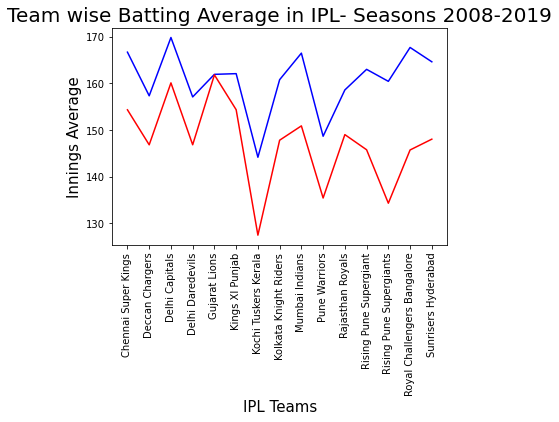

In [18]:
first_innins_run=file[file['inning']==1]
team_innings_run=first_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'b')
second_innins_run=file[file['inning']==2]
team_innings_run=second_innins_run.groupby(['batting_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_avg=team_innings_run.groupby('batting_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_avg['batting_team'],team_innings_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Batting Average in IPL- Seasons 2008-2019',size=20)

# Innings wise bowling average of the Teams

Text(0.5, 1.0, 'Team wise Bowling Average in IPL- Seasons 2008-2019')

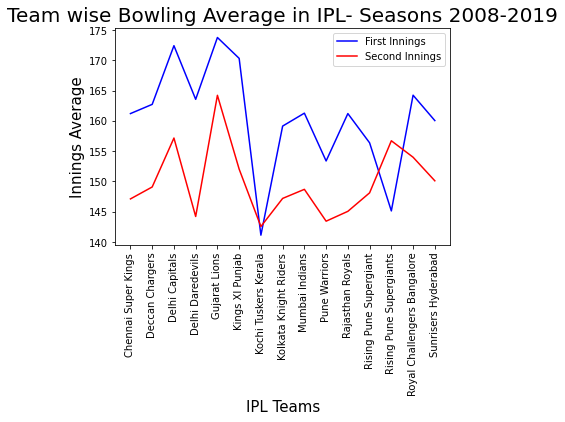

In [19]:
first_innins_score=file[file['inning']==1]
team_innings_score=first_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_innings_score_avg=team_innings_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_innings_score_avg['bowling_team'],team_innings_score_avg['Innings Average'],'b')
second_innins_score=file[file['inning']==2]
team_innings_second_score=second_innins_score.groupby(['bowling_team','match_id']).apply(lambda x:np.sum(x['total_runs'])).reset_index(name='Innings Total')
team_second_innings_score_avg=team_innings_second_score.groupby('bowling_team').apply(lambda x:np.mean(x['Innings Total'])).reset_index(name='Innings Average')
plt.plot(team_second_innings_score_avg['bowling_team'],team_second_innings_score_avg['Innings Average'],'r')
plt.xticks(rotation=90)
plt.legend(['First Innings','Second Innings'],prop={'size':10})
plt.xlabel('IPL Teams',size=15)
plt.ylabel('Innings Average',size=15)
plt.title('Team wise Bowling Average in IPL- Seasons 2008-2019',size=20)

**Observation:** One distinct observation that we have seen in this case is the second innings Batting and Bowling averages are less as compared to the firts innings.

# Win by Runs/Win by Wickets- Team wise Average

Text(0.5, 1.0, 'Teams Average winning by Runs/Wickets Summary')

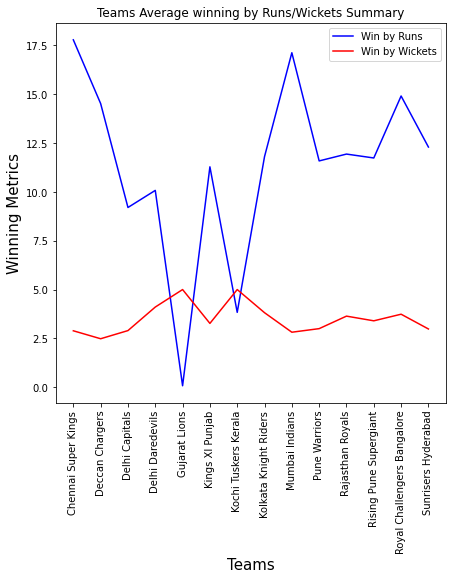

In [20]:
win_runs=file2.groupby('winner').apply(lambda x:np.average(x['win_by_runs'])).reset_index(name='Win By Runs Average')
win_wickets=file2.groupby('winner').apply(lambda x:np.average(x['win_by_wickets'])).reset_index(name='Win By Wickets Average')
plt.figure(figsize=(7,7))
plt.plot(win_runs['winner'],win_runs['Win By Runs Average'],color='b')
plt.plot(win_wickets['winner'],win_wickets['Win By Wickets Average'],color='r')
plt.xlabel('Teams',size=15)
plt.xticks(rotation=90)
plt.ylabel('Winning Metrics',size=15)
plt.legend(['Win by Runs','Win by Wickets'])
plt.title('Teams Average winning by Runs/Wickets Summary')

**Observation** While most teams have won matches with an average of 10+ runs- only 2 teams have shown values which are less than 5- Gujrat Lions and Kochi Tuskers Kerela. These teams have participated in limited seasons, and their results have not been succesful. But on a surprising note- they have won matches with an average wicket of 5+- which is a good sign in terms of the bowling attack of the team. 

# Head to Head Match Analysis between the Teams of IPL

PS. We have only kept the teams that are currently existing in the IPL'20. The Teams which had been a part of the Tournament previously and is not existing anymore- have been excluded- since their contribution would not be significant anymore

Text(23.999999999999986, 0.5, 'Match')

<Figure size 432x288 with 0 Axes>

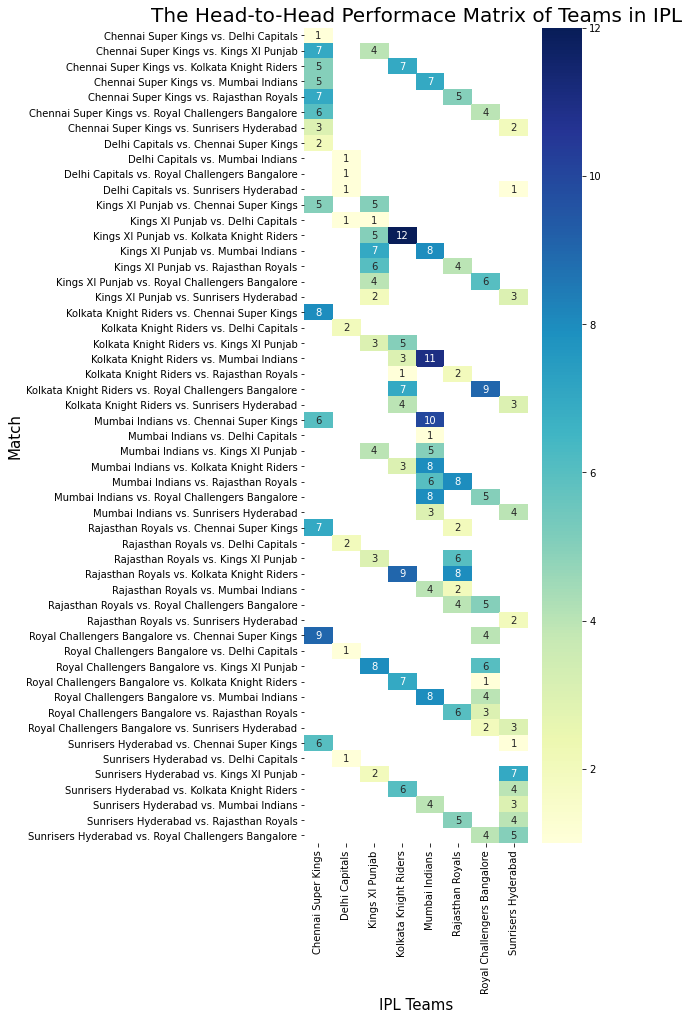

In [21]:
Current_teams=['Chennai Super Kings','Mumbai Indians','Rajasthan Royals','Delhi Capitals','Sunrisers Hyderabad','Kolkata Knight Riders','Royal Challengers Bangalore','Kings XI Punjab']
team_1_filter=file2[file2.team1.isin(Current_teams)]
team_2_filter=team_1_filter[team_1_filter.team2.isin(Current_teams)]
teams_filter=team_2_filter[team_2_filter.winner.isin(Current_teams)]
head_to_head_matches=teams_filter.groupby(['team1','team2','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Winning Counts')
head_to_head_matches['Game']=head_to_head_matches['team1']+' vs. '+head_to_head_matches['team2']
head_to_head_matches.loc[:,['Game','winner','Winning Counts']]
heatmap1_data = pd.pivot_table(head_to_head_matches, values='Winning Counts', 
                     index=['Game'], 
                     columns='winner')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap1_data,annot=True, cmap="YlGnBu",fmt='g')
ax.set_title('The Head-to-Head Performace Matrix of Teams in IPL',size=20)
ax.set_xlabel('IPL Teams',size=15)
ax.set_ylabel('Match',size=15)

# Team wise winning Performance at Venues

Text(0.5, 1.0, 'Team wise wins at the Venues')

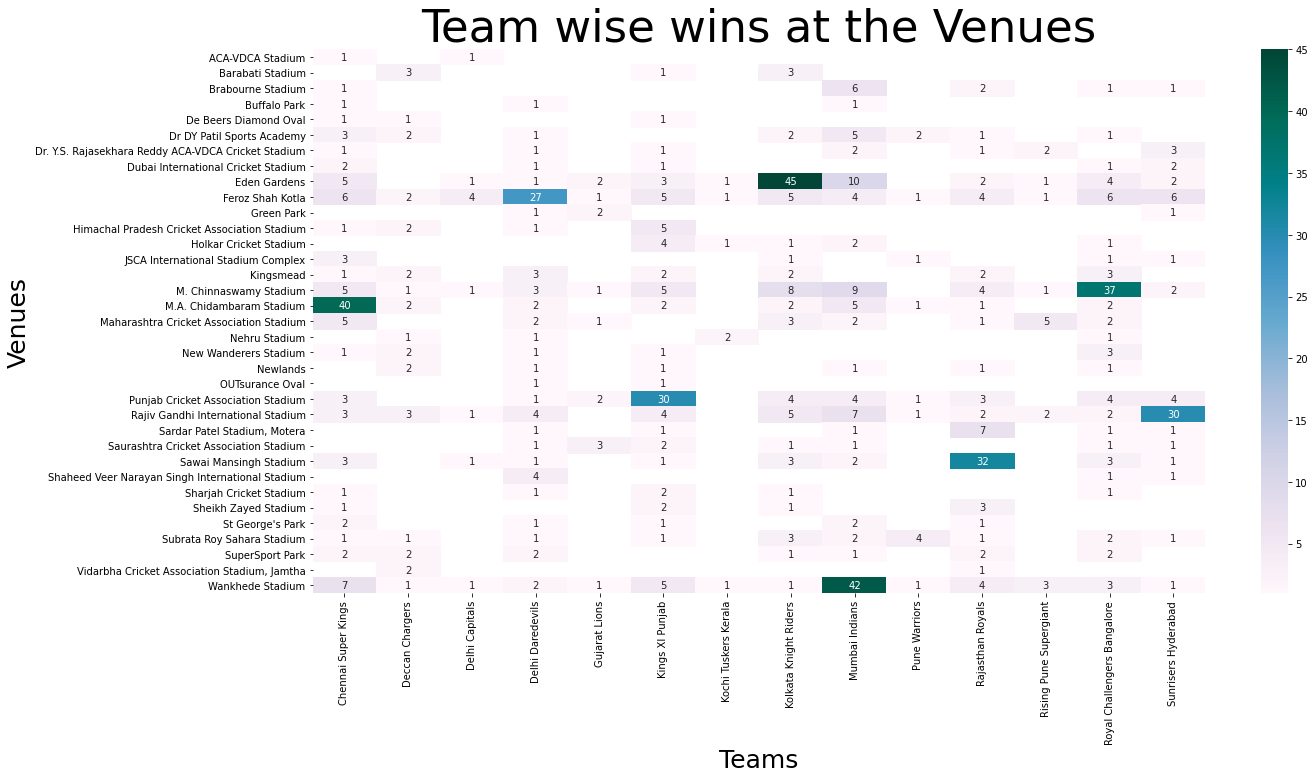

In [22]:
venue_win=file2.groupby(['venue','winner']).apply(lambda x:x['winner'].count()).reset_index(name='Match Wins')
venue_win_pvt=pd.pivot(venue_win,values='Match Wins',index='venue',columns='winner')
venue_win_pvt.replace(np.NaN,0)
plt.figure(figsize=(20,10))
htmp=sns.heatmap(venue_win_pvt,annot=True,fmt='g',cmap='PuBuGn')
plt.xlabel('Teams',size=25)
plt.ylabel('Venues',size=25)
plt.title('Team wise wins at the Venues',size=45)

**Observation** The blue and green highlights are expected for the particular teams at the venues- For e.g. Chennai Super Kings at M.A. Chidambaram, Kolkata Knight Riders at Eden Gardens and Mumbai Indians at Wankhede Stadium-since the Venues being located at their home stadium, they have played more number of matches in that place. And since, more the number of games being played, more will obviously be the chances of winnings at the particular venue.
But ignoring those, ie, when considering a teams capability to perform in the away matches, we see Mumbai Indians and Chennai Super Kings have shown very good performances in different venues, and that too multiple times. Undoubtedly, they have been the most succesful teams in the history of the tournament.

# Venue wise Best Performers

**Note:** For Venues, where more than one players have received the "Man of the Match" award maximum times, we present both the player in the analysis. 

Text(0.5, 1.0, 'Players with the Best Performance at Venues')

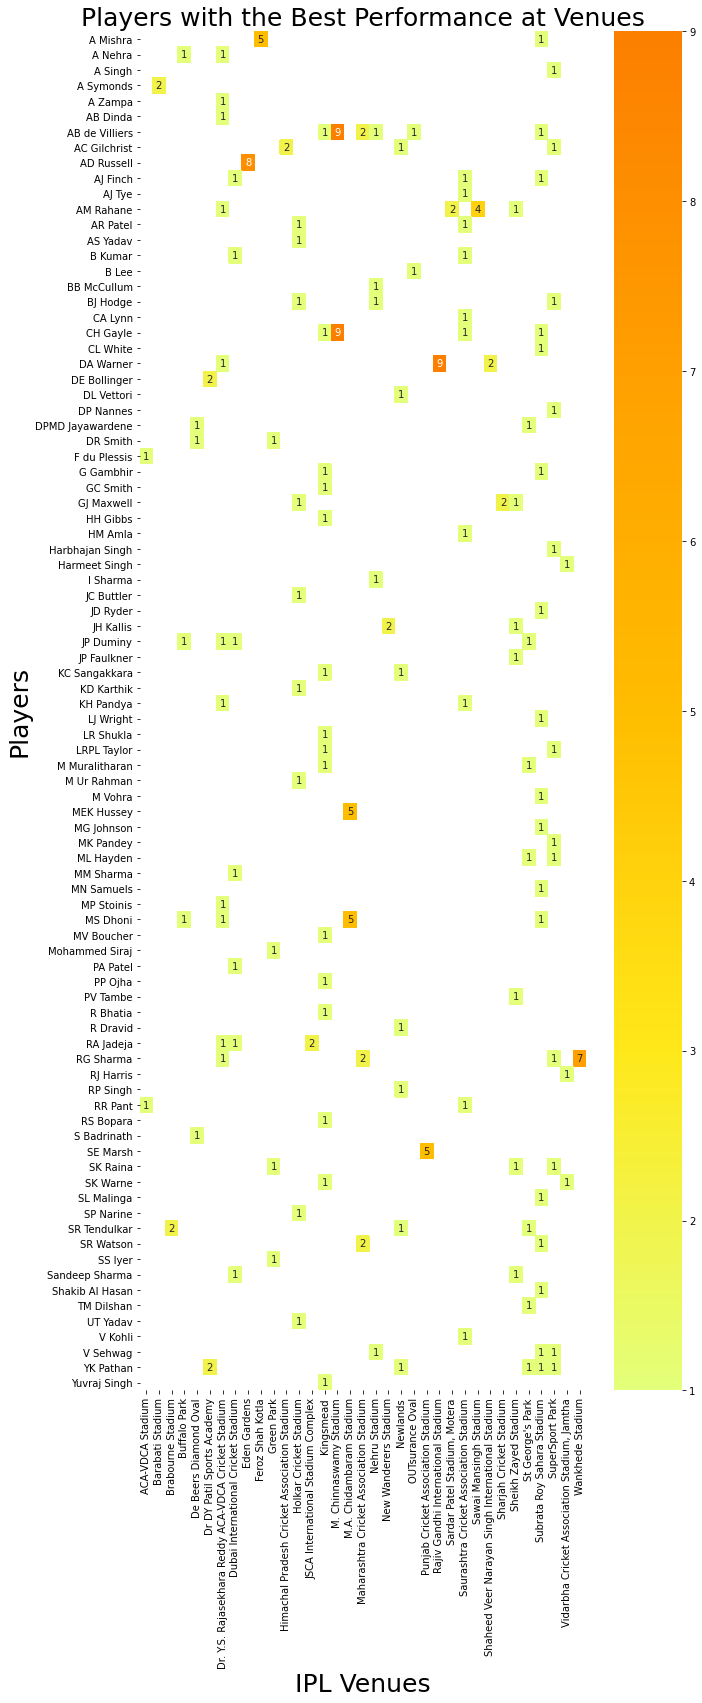

In [23]:
venue_mom=file2.groupby(['venue','player_of_match']).apply(lambda x:x['player_of_match'].count()).reset_index(name='MoM_Winner')
venue_mom_sort=venue_mom.sort_values(by=['venue','MoM_Winner'],ascending=[True,False])
venue_mom_count_max=venue_mom_sort.groupby(['venue']).apply(lambda x:np.max(x['MoM_Winner'])).reset_index(name='MoM_Winner')
venue_best=pd.merge(venue_mom,venue_mom_count_max,how='inner',left_on=['venue','MoM_Winner'],right_on=['venue','MoM_Winner'])
venue_best_multiple_pivot=pd.pivot(venue_best,values='MoM_Winner',index='player_of_match',columns='venue')
plt.figure(figsize=(10,25))
sns.heatmap(venue_best_multiple_pivot,annot=True,fmt='g',cmap='Wistia')
plt.xlabel('IPL Venues',size=25)
plt.ylabel('Players',size=25)
plt.title('Players with the Best Performance at Venues',size=25)

**Observation** Similar to the Team performances, Players have won more number of "Man of the Match" Trophies at their Home Ground. But some Players like AB de Villiers, Chris Gayle and MS Dhoni have performed significantly well in away Grounds as well. 

This metrics shows the reliability of a player when they are playing the game- irrespective of Home/Away Psychology. They can be relied upon as the key players in the team to perform.

# The Toss Decisions taken by Venue Heatmap-in IPL

Text(0.5, 1.0, 'The Toss Decisions taken by Venue Heatmap-in IPL')

<Figure size 432x288 with 0 Axes>

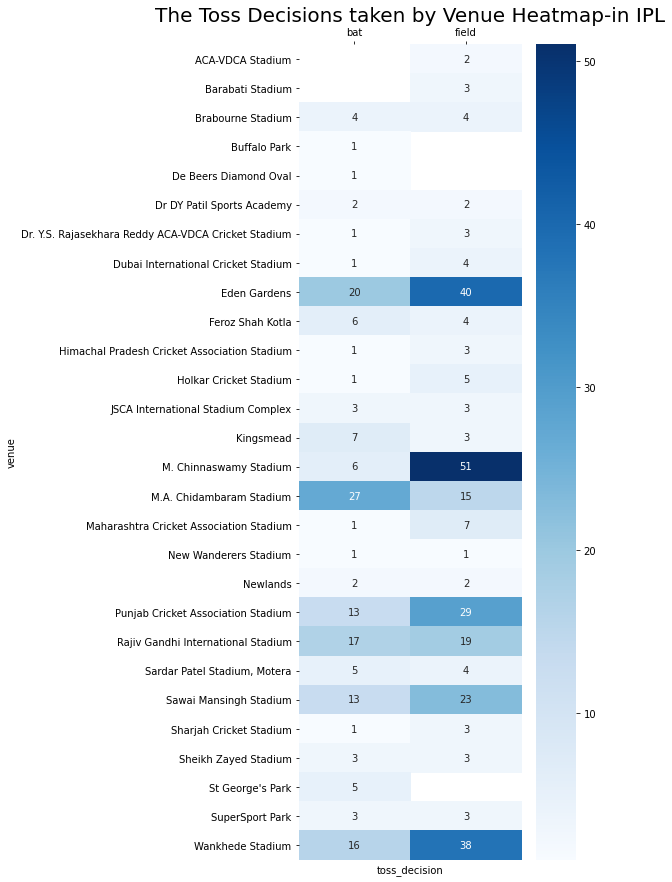

In [24]:
venue_toss=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:x['toss_decision'].count()).reset_index(name='Toss Decision Counts')
heatmap2_data = pd.pivot_table(venue_toss, values='Toss Decision Counts', 
                     index=['venue'], 
                     columns='toss_decision')
fig = plt.figure()
fig, ax = plt.subplots(1,1, figsize=(5,15))
g=sns.heatmap(heatmap2_data,annot=True, cmap="Blues",fmt='g')
g.xaxis.set_ticks_position("top")
ax.set_title('The Toss Decisions taken by Venue Heatmap-in IPL',size=20)

# Analyzing the Impact of Toss- The team winning Toss winning/losing the match- Venue and decision level analysis

In [25]:
venue_toss_result=teams_filter.groupby(['venue','toss_decision']).apply(lambda x:np.sum(np.where(x['toss_winner']==x['winner'],1,0))).reset_index(name='Toss Winner Wins Match')
merged_venue_data=pd.merge(venue_toss_result,venue_toss,how='inner',left_on=['venue','toss_decision'],right_on=['venue','toss_decision'])
merged_venue_data['Toss Winner Lose Match']=merged_venue_data['Toss Decision Counts']-merged_venue_data['Toss Winner Wins Match']
merged_data_arranged=merged_venue_data.loc[:,['venue','toss_decision','Toss Decision Counts','Toss Winner Wins Match','Toss Winner Lose Match']]
merged_data_arranged

,venue,toss_decision,Toss Decision Counts,Toss Winner Wins Match,Toss Winner Lose Match
0,ACA-VDCA Stadium,field,2,2,0
1,Barabati Stadium,field,3,2,1
2,Brabourne Stadium,bat,4,2,2
3,Brabourne Stadium,field,4,3,1
4,Buffalo Park,bat,1,1,0
5,De Beers Diamond Oval,bat,1,0,1
6,Dr DY Patil Sports Academy,bat,2,2,0
7,Dr DY Patil Sports Academy,field,2,2,0
8,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,bat,1,0,1
9,Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket St...,field,3,1,2


**Observation**: As we can see in the data above, teams that have decided to field first, have won more number of matches in most of the fields. Although this is a completely data viewed analogy, The above represenattaion is not quite pleasing. Hence we have plotted a Heatmap below to understand the impact of Toss- and the decision chosen at each venue.

# Heatmap representation of the Win/Loss Analysis by Venue and Toss Decision

Text(50.999999999999986, 0.5, 'Stadium')

<Figure size 432x288 with 0 Axes>

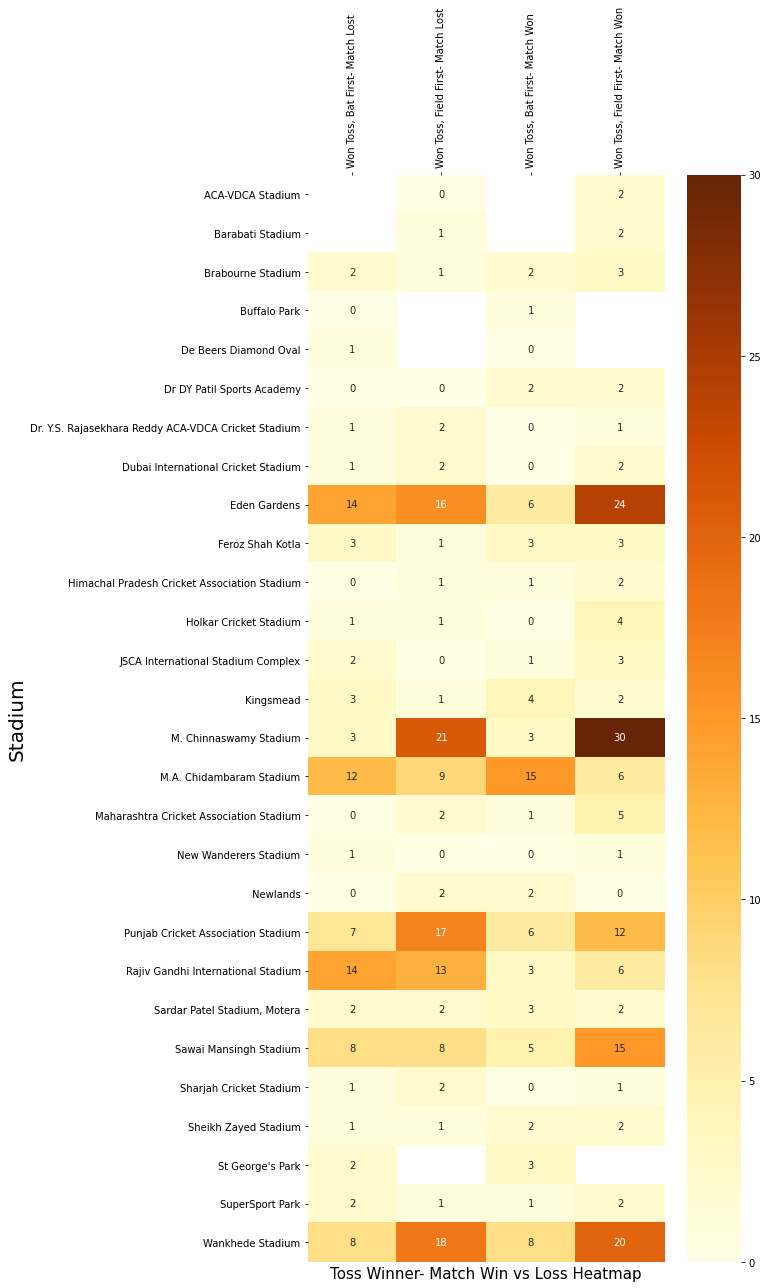

In [26]:
heatmap3_data = pd.pivot_table(merged_venue_data, values=['Toss Winner Wins Match','Toss Winner Lose Match'], 
                     index=['venue'], 
                     columns='toss_decision')
fig=plt.figure()
fig,ax1=plt.subplots(1,1,figsize=(8,20))
g=sns.heatmap(heatmap3_data,annot=True,cmap='YlOrBr',fmt='g')
g.xaxis.set_ticks_position("top")
g.set_xticklabels(['Won Toss, Bat First- Match Lost','Won Toss, Field First- Match Lost','Won Toss, Bat First- Match Won','Won Toss, Field First- Match Won'],rotation=90)
g.set_xlabel('Toss Winner- Match Win vs Loss Heatmap',size=15)
g.set_ylabel('Stadium',size=20)

**Observation**: Indeed we have noticed that teams fielding first have won more number of matches in the following Stadiums- Chinnawamy and Eden Gardens. One of the most predominating factors in this regards is the spinner friendly pitches in these grounds, as well as the close proximity to the oceans, which induce rains and overcast conditions- helping the fielding teams to restrict the batting Teams.

# Summary:

**Conclusion:** We have now come to the point where we summarize out findings. We shall be providing them in the below points:
1. The Tournament has shown a slight favourism towards the winning Teams. What I mean to say is Stadiums like Chinnaswamy, Eden Gardens, Wankhede etc have hosted huge number of games. Now obviously this factor adds an edge to the home teams for these stadiums- and indeed they have been the most succesful teams in the history of the Tournament- Chennia Super Kings, Kolkata Knight Riders, Mumbai Indians etc. Although this is not the prime factor, yet has a weightage.
2. Multiple players who could have been a good potential to the world of Cricket- have got very less appearence opportunities, or have been dropped due to a few inconsistent performances. We often come across news of players in the Indian Premier League, who have left the game of cricket and resorted to means to support their families.
3. Since Each Team gets an opportunity to Play atleast 7 matches in their Home Ground, most teams have also won the highest number of their wins in their Home Grounds. But Teams like Mumbai Indians and Chennai Super Kings have performed really well at away grounds too. This constitutes one of the major reasons, as to  why these teams have been the most succesful in the IPL History.
4. The Batting and Bowling Averages of most of teams are better in the First innings-as compared to the second innings.

Just would like to add a few points from the data standpoint:
1. The datasource was very stable and clean. Data cleaning activities were not very difficult and overall it helped a lot in the analysis.
2. The data was very rich- Ball by Ball data has been provided across 12 seasons- which is actually a very difficult task to manage. Thanks a lot for the data!

# Please Upvote if you liked the analysis and suggest how can this be improved!!!